### Word Embeddings(Using Supervised Learning)

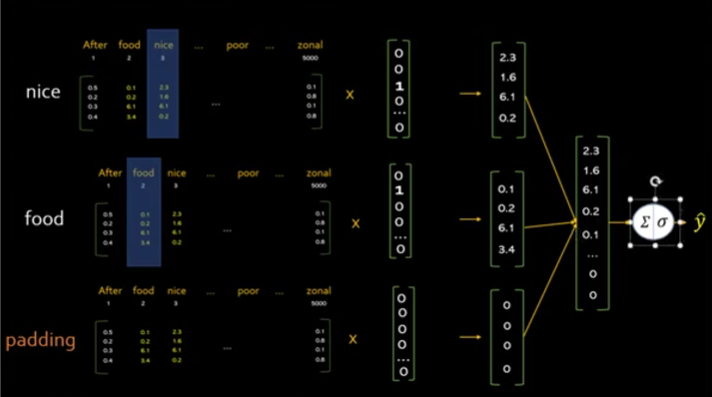

- we will solve a false NLP problem of Sentiment Analysis(positive or negative reviews) and get the word embeddings as a by product after training

In [27]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [29]:
reviews = ["nice food",
           "amazing restaurant",
           "too good",
           "just loved it",
           "will go again",
           "horrible food",
           "never go there",
           "poor service",
           "poor quality",
           "needs improvement"]

sentiment = np.array([1,1,1,1,1,0,0,0,0,0])

In [30]:
one_hot("amazing restaurant", 50) # this will give every word a number between 0 to 50
# "amazing resturant" => [number 1, number 2]

[11, 19]

In [33]:
vocab_size  = 50
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[14, 24],
 [11, 19],
 [18, 35],
 [11, 2, 25],
 [4, 29, 26],
 [45, 24],
 [27, 29, 14],
 [36, 41],
 [36, 7],
 [48, 16]]

In [34]:
# add padding according to max length sentence
max_length = 3 # we can give greater than 3 too
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding="post")
padded_reviews

array([[14, 24,  0],
       [11, 19,  0],
       [18, 35,  0],
       [11,  2, 25],
       [ 4, 29, 26],
       [45, 24,  0],
       [27, 29, 14],
       [36, 41,  0],
       [36,  7,  0],
       [48, 16,  0]])

In [35]:
embedded_vector_size = 4 # embedding dimension

model = Sequential()
model.add(Embedding(vocab_size, embedded_vector_size, name="embeddings")) # create embeddings layer
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [36]:
X = padded_reviews
y = sentiment

In [37]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embeddings (Embedding)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X, y, epochs=50, verbose=0)

In [39]:
loss, accuracy = model.evaluate(X,y)
accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.6105


1.0

In [40]:
# these weights are the WORD EMBEDDINGS
weights = model.get_layer("embeddings").get_weights()[0]
len(weights)

50

In [43]:
weights

array([[-0.03482066, -0.02126252,  0.02565113, -0.01108585],
       [ 0.03449873,  0.0234396 ,  0.01044897, -0.02979572],
       [ 0.02224102,  0.07554014, -0.08603113, -0.06649727],
       [ 0.02771349, -0.02818551,  0.04144583, -0.00586607],
       [-0.00652445, -0.09567419,  0.04490563,  0.04222767],
       [ 0.03674493,  0.00568684,  0.01093041, -0.04512013],
       [ 0.04635092, -0.03932763, -0.02662938, -0.01073283],
       [-0.06031492, -0.02766163,  0.05230266,  0.00802031],
       [-0.03675344, -0.00892074, -0.03630251, -0.03232111],
       [-0.0287561 ,  0.01057136,  0.00032725, -0.02176298],
       [ 0.00295538, -0.04817688,  0.01995784,  0.04846198],
       [-0.06427849, -0.06709637,  0.09780617,  0.10230353],
       [ 0.04282876,  0.04653553, -0.04945313, -0.02357438],
       [-0.01881367, -0.00255265,  0.03582643,  0.03045127],
       [-0.10436106, -0.02099665,  0.08332889,  0.00094126],
       [ 0.01167841,  0.02223443, -0.0428632 ,  0.03447715],
       [-0.06417659, -0.

In [42]:
# encoding for word "nice" is 14
print("nice - ", weights[14])
# encoding for word "good" is 35
print("good - ", weights[35])
# encoding for word "poor" is 36
print("poor - ", weights[36])

nice -  [-0.10436106 -0.02099665  0.08332889  0.00094126]
good -  [ 0.0422753   0.04582582 -0.07440817 -0.09548508]
poor -  [ 0.07141281  0.08926346 -0.05361335 -0.03258491]


- Similar meaning words have close(similar) embeddings vector
- since our dataset is very small it's not accurate here